In [151]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [152]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [156]:
DATA_PATH = '../../data/agent-benchmark/'
ORIGINAL_DATASET = os.path.join(DATA_PATH, 'paraphrases_and_intents_26k.csv')
POST_PROC_DATASET = os.path.join(DATA_PATH, 'nlu-data-home-domain-post-proc.csv')
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [157]:
data = pd.read_csv(ORIGINAL_DATASET, header=2, index_col=False, sep=';', engine='python', names=['utterance','label'])

In [158]:
labels = data['label']
data.head()

,utterance,label
0,set an alarm for two hours from now,alarm_set
1,cancel business meeting on wednesday,calendar_delete_event
2,delete the richard's wedding event next year,calendar_delete_event
3,remove standup on friday at ten am,calendar_delete_event
4,add new email to anna,email_send_email


In [159]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
null_columns=data.columns[data.isnull().any()]
print(data[data.isnull().any(axis=1)])

      utterance                   label
3614        NaN        email_send_email
3615        NaN        email_send_email
4532        NaN              radio_play
7263        NaN        email_send_email
7264        NaN        email_send_email
11449       NaN  recommendation_events 
11450       NaN  recommendation_events 
12382       NaN             lists_query
13966       NaN        email_send_email
19313       NaN              audio_mute


## Check for null Values

In [162]:
null_columns=data.columns[data.isnull().any()]
print(data[data.isnull().any(axis=1)])

Empty DataFrame
Columns: [utterance, label]
Index: []


In [163]:
data = data.dropna()

In [166]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
bytag = data.groupby('label').aggregate(np.count_nonzero)
print(bytag.sort_values(by='utterance', ascending=False))

                           utterance
label                               
music_play                      1218
IOT_hue                         1068
QA_factoid                       973
calendar_set_event               959
email_query                      887
weather_request                  839
general_conversation             824
calendar_delete_event            729
news_query                       729
radio_play                       697
general_feedback                 696
datetime_query                   674
QA_definition                    618
calendar_query_event             610
QA_open_query                    599
email_send_email                 582
social_post                      581
QA_celebrity                     539
podcasts_play                    480
lists_query                      477
transport_train                  477
weather_question                 439
music_preferences                416
lists_remove                     403
reminder_set                     372
g

In [167]:
bytag = data.groupby('label').aggregate(np.count_nonzero)
print(bytag.sort_values(by='utterance', ascending=False))

                           utterance
label                               
music_play                      1218
IOT_hue                         1068
QA_factoid                       973
calendar_set_event               959
email_query                      887
weather_request                  839
general_conversation             824
calendar_delete_event            729
news_query                       729
radio_play                       697
general_feedback                 696
datetime_query                   674
QA_definition                    618
calendar_query_event             610
QA_open_query                    599
email_send_email                 582
social_post                      581
QA_celebrity                     539
podcasts_play                    480
lists_query                      477
transport_train                  477
weather_question                 439
music_preferences                416
lists_remove                     403
reminder_set                     372
g

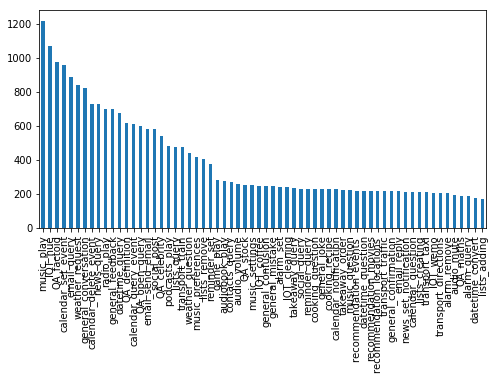

In [9]:
data.label.value_counts().plot.bar(figsize=(8,4))

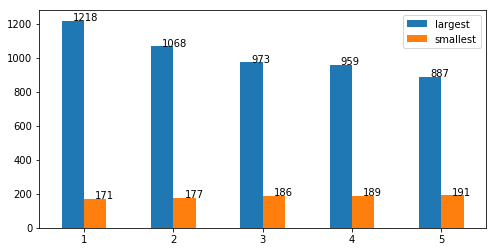

In [10]:
largest_qtys = [1218,1068,973,959,887] 
smallest_qtys = [171,177,186,189,191]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

### Splits dataset into train, test and validation sets

In [11]:
train_posts, test_posts, train_tags, test_tags = train_test_split(data['utterance'], data['label'],
                                                    stratify=data['label'], shuffle=True,
                                                    test_size=0.20)

train_posts, val_posts, train_tags, val_tags = train_test_split(train_posts, train_tags,
                                                    stratify=train_tags, shuffle=True,
                                                    test_size=0.10)



In [12]:
train_posts = train_posts.values.reshape(train_posts.shape[0], 1)
val_posts = val_posts.values.reshape(val_posts.shape[0], 1)
test_posts = test_posts.values.reshape(test_posts.shape[0], 1)

train_tags = train_tags.values.reshape(train_tags.shape[0], 1)
val_tags = val_tags.values.reshape(val_tags.shape[0], 1)
test_tags = test_tags.values.reshape(test_tags.shape[0], 1)

train_dataset = np.hstack([train_posts, train_tags])
val_dataset = np.hstack([val_posts, val_tags])
test_dataset = np.hstack([test_posts, test_tags])

In [13]:
print('train_posts shape: ' + str(train_posts.shape))
print('train_tags shape: ' + str(train_posts.shape))
print('val_posts shape: ' + str(val_posts.shape))
print('val_tags shape: ' + str(val_posts.shape))
print('test_posts shape: ' + str(test_posts.shape))
print('test_tags shape: ' + str(test_tags.shape))
print('train_dataset shape: ' + str(train_dataset.shape))
print('val_dataset shape: ' + str(val_dataset.shape))
print('test_dataset shape: ' + str(test_dataset.shape))

train_posts shape: (18415, 1)
train_tags shape: (18415, 1)
val_posts shape: (2047, 1)
val_tags shape: (2047, 1)
test_posts shape: (5116, 1)
test_tags shape: (5116, 1)
train_dataset shape: (18415, 2)
val_dataset shape: (2047, 2)
test_dataset shape: (5116, 2)


In [14]:
np.savetxt(TRAIN_DATASET, train_dataset,fmt="%s", delimiter=";")
np.savetxt(VAL_DATASET, val_dataset,fmt="%s", delimiter=";")
np.savetxt(TEST_DATASET, test_dataset,fmt="%s", delimiter=";")

###  Sentence size (token number) distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


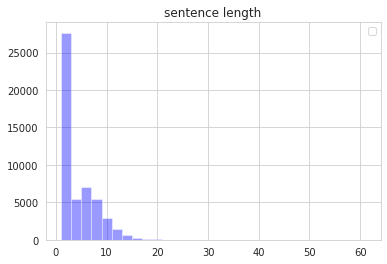

In [168]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0

sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
sentence_len = length_checker(data) 
sns.distplot(sentence_len,bins= 30, hist=True, kde=False, color='b')
#plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('sentence length'); plt.legend()
plt.show()


In [169]:
print('max seq len ', sentence_len.max())
print('mean ', sentence_len.mean())
print('std dev ', sentence_len.std())

max seq len  61
mean  3.734830713894753
std dev  3.6180481579301205
